In [43]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import numpy as np

KeyboardInterrupt: 

# **Merging csv files**

In [2]:
root_folder = "/content/drive/MyDrive/graduation project/vehicle dynamics/base dataset"
output_file = "/content/drive/MyDrive/graduation project/vehicle dynamics/output/merged_output.csv"

In [3]:
def merge_csv_files(root_folder, output_file):
    merged_data = []

    # Get all subfolders in root_folder
    subfolders = [f.path for f in os.scandir(root_folder) if f.is_dir()]

    for folder in subfolders:
        acc_file = os.path.join(folder, "Accelerometer.csv")
        gyro_file = os.path.join(folder, "Gyroscope.csv")

        if os.path.exists(acc_file) and os.path.exists(gyro_file):
            # Read the accelerometer data, handling potential column name variations
            acc_data = pd.read_csv(acc_file)
            # Rename columns
            acc_data = acc_data.rename(columns={
                'X': 'X_Accelerometer',
                'Y': 'Y_Accelerometer',
                'Z': 'Z_Accelerometer'
            })
            acc_data = acc_data[['X_Accelerometer', 'Y_Accelerometer', 'Z_Accelerometer']]

            # Read the gyroscope data, handling potential column name variations
            gyro_data = pd.read_csv(gyro_file)
            gyro_data = gyro_data.rename(columns={
                'X': 'X_Gyroscope',
                'Y': 'Y_Gyroscope'
            })
            gyro_data = gyro_data[['X_Gyroscope', 'Y_Gyroscope']]

            merged_df = pd.concat([gyro_data, acc_data], axis=1)
            merged_data.append(merged_df)

    if merged_data:
        final_df = pd.concat(merged_data, ignore_index=True)
        final_df.to_csv(output_file, index=False)
        print(f"Merged data saved to {output_file}")
    else:
        print("No valid folders found with both Accelerometer.csv and Gyroscope.csv.")

In [4]:
# Run the function
merge_csv_files(root_folder, output_file)

Merged data saved to /content/drive/MyDrive/graduation project/vehicle dynamics/output/merged_output.csv


In [5]:
from google.colab import drive
import os
import pandas as pd
import numpy as np

drive.mount('/content/drive')

# **Merging csv files**
root_folder = "/content/drive/MyDrive/graduation project/vehicle dynamics/base dataset"
output_file = "/content/drive/MyDrive/graduation project/vehicle dynamics/output/merged_output.csv"

def merge_csv_files(root_folder, output_file):
    merged_data = []

    # Get all subfolders in root_folder
    subfolders = [f.path for f in os.scandir(root_folder) if f.is_dir()]

    for folder in subfolders:
        acc_file = os.path.join(folder, "Accelerometer.csv")
        gyro_file = os.path.join(folder, "Gyroscope.csv")

        if os.path.exists(acc_file) and os.path.exists(gyro_file):
            # Read the accelerometer data, handling potential column name variations
            acc_data = pd.read_csv(acc_file)
            # Rename columns
            acc_data = acc_data.rename(columns={
                'X': 'X_Accelerometer',
                'Y': 'Y_Accelerometer',
                'Z': 'Z_Accelerometer'
            })
            acc_data = acc_data[['X_Accelerometer', 'Y_Accelerometer', 'Z_Accelerometer']]

            # Read the gyroscope data, handling potential column name variations
            gyro_data = pd.read_csv(gyro_file)
            gyro_data = gyro_data.rename(columns={
                'X': 'X_Gyroscope',
                'Y': 'Y_Gyroscope'
            })
            gyro_data = gyro_data[['X_Gyroscope', 'Y_Gyroscope']]

            merged_df = pd.concat([gyro_data, acc_data], axis=1)
            merged_data.append(merged_df)

    if merged_data:
        final_df = pd.concat(merged_data, ignore_index=True)
        # Drop rows with NaN values
        final_df.dropna(inplace=True)
        final_df.to_csv(output_file, index=False)
        print(f"Merged data saved to {output_file}")
    else:
        print("No valid folders found with both Accelerometer.csv and Gyroscope.csv.")

# Run the function
merge_csv_files(root_folder, output_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Merged data saved to /content/drive/MyDrive/graduation project/vehicle dynamics/output/merged_output.csv


# **Making the clusters to label the dataset**

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
# Load the merged dataset
file_path = "/content/drive/MyDrive/graduation project/vehicle dynamics/output/merged_output.csv"  # Update path if needed
df = pd.read_csv(file_path)

In [8]:
df.head()

,X_Gyroscope,Y_Gyroscope,X_Accelerometer,Y_Accelerometer,Z_Accelerometer
0,-0.502960,-0.306381,-0.005081,3.642151,9.712418
1,-0.262756,-0.094391,-0.176865,3.452423,9.970398
2,0.199036,0.248093,-0.067932,3.423096,9.891983
3,0.287460,0.285370,0.134979,3.409927,9.470001
4,0.254440,0.248093,0.205612,3.350662,8.900192


In [9]:
# Drop any missing values
df.dropna(inplace=True)

In [10]:
#feature selection
features = ['X_Gyroscope', 'Y_Gyroscope', 'X_Accelerometer', 'Y_Accelerometer', 'Z_Accelerometer']
X = df[features]

In [11]:
# applying 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

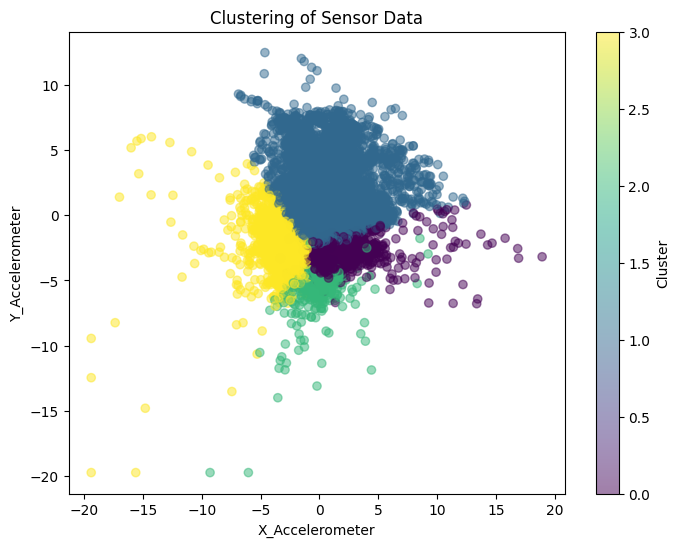

In [12]:
# Plot Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['X_Accelerometer'], df['Y_Accelerometer'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('X_Accelerometer')
plt.ylabel('Y_Accelerometer')
plt.title('Clustering of Sensor Data')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
df.to_csv("/content/drive/MyDrive/graduation project/vehicle dynamics/output/clustered_output.csv", index=False)
print("Clustered data saved to Drive.")

Clustered data saved to Drive.


In [14]:
df.head()

,X_Gyroscope,Y_Gyroscope,X_Accelerometer,Y_Accelerometer,Z_Accelerometer,Cluster
0,-0.502960,-0.306381,-0.005081,3.642151,9.712418,1
1,-0.262756,-0.094391,-0.176865,3.452423,9.970398,1
2,0.199036,0.248093,-0.067932,3.423096,9.891983,1
3,0.287460,0.285370,0.134979,3.409927,9.470001,1
4,0.254440,0.248093,0.205612,3.350662,8.900192,1


In [15]:
import random
df = pd.read_csv("/content/drive/MyDrive/graduation project/vehicle dynamics/output/clustered_output.csv")

# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Print a random line from each cluster
print("\nRandom Sample from Each Cluster:")
for cluster_label in cluster_counts.index:
  cluster_data = df[df['Cluster'] == cluster_label]
  random_index = random.choice(cluster_data.index)
  print(f"Cluster {cluster_label}:")
  print(df.loc[random_index]) # Print the entire row
  print("---")

Cluster Counts:
Cluster
1    552579
0    138058
2    125307
3    108467
Name: count, dtype: int64

Random Sample from Each Cluster:
Cluster 1:
X_Gyroscope       -0.016739
Y_Gyroscope       -0.005081
X_Accelerometer   -0.861603
Y_Accelerometer    1.749542
Z_Accelerometer    9.398178
Cluster            1.000000
Name: 293268, dtype: float64
---
Cluster 0:
X_Gyroscope        0.011124
Y_Gyroscope       -0.057098
X_Accelerometer    1.025619
Y_Accelerometer   -3.208252
Z_Accelerometer    9.957825
Cluster            0.000000
Name: 123127, dtype: float64
---
Cluster 2:
X_Gyroscope        0.048813
Y_Gyroscope        0.034286
X_Accelerometer    0.292999
Y_Accelerometer   -5.711395
Z_Accelerometer    8.885223
Cluster            2.000000
Name: 669797, dtype: float64
---
Cluster 3:
X_Gyroscope       -0.000198
Y_Gyroscope       -0.104126
X_Accelerometer   -2.788940
Y_Accelerometer   -3.184311
Z_Accelerometer    9.748932
Cluster            3.000000
Name: 846410, dtype: float64
---


======================================
* cluster 0 : smooth
* cluster 1 : normal
* cluster 2 : agressive
* cluster 3 : keen

# **Creating a rf model**

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.drop_duplicates()

df['X_Accelerometer'] = df['X_Accelerometer'].rolling(window=5).mean()
df['Y_Accelerometer'] = df['Y_Accelerometer'].rolling(window=5).mean()
df['Z_Accelerometer'] = df['Z_Accelerometer'].rolling(window=5).mean()

<ipython-input-18-2650359209>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X_Accelerometer'] = df['X_Accelerometer'].rolling(window=5).mean()
<ipython-input-18-2650359209>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_Accelerometer'] = df['Y_Accelerometer'].rolling(window=5).mean()
<ipython-input-18-2650359209>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [19]:
cluster_mapping = {
    0: "smooth",
    1: "normal",
    2: "aggressive",
    3: "keen"
}

df['Cluster'] = df['Cluster'].map(cluster_mapping)
df.to_csv("/content/drive/MyDrive/graduation project/vehicle dynamics/output/clustered_output.csv", index=False)

df.head()

<ipython-input-19-2864782247>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = df['Cluster'].map(cluster_mapping)


,X_Gyroscope,Y_Gyroscope,X_Accelerometer,Y_Accelerometer,Z_Accelerometer,Cluster
0,-0.000198,-0.104126,NaN,NaN,NaN,keen
1,0.010269,0.281235,NaN,NaN,NaN,normal
2,-0.052048,-0.178970,NaN,NaN,NaN,normal
3,0.011124,-0.057098,NaN,NaN,NaN,smooth
5,0.002121,0.032120,-0.268445,-1.99834,10.357297,normal


In [20]:
# Load the clustered data
df = pd.read_csv("/content/drive/MyDrive/graduation project/vehicle dynamics/output/clustered_output.csv")

# Define features (X) and target variable (y)
features = ['X_Gyroscope', 'Y_Gyroscope', 'X_Accelerometer', 'Y_Accelerometer', 'Z_Accelerometer']
X = df[features]
y = df['Cluster']

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)


In [33]:
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    max_depth=7,
    min_samples_split=15,
    min_samples_leaf=5,
    random_state=42,
    class_weight="balanced",
    max_features="sqrt"
)

In [34]:
# Cross-validation to check generalization
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.47031168 0.46944106 0.47653461 0.46538964 0.47200697]
Mean cross-validation accuracy: 0.47073679141937363


In [35]:
# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

              precision    recall  f1-score   support

  aggressive       0.19      0.47      0.27      1001
        keen       0.26      0.53      0.35      1561
      normal       0.73      0.52      0.61      8352
      smooth       0.35      0.28      0.31      3443

    accuracy                           0.46     14357
   macro avg       0.38      0.45      0.39     14357
weighted avg       0.55      0.46      0.49     14357



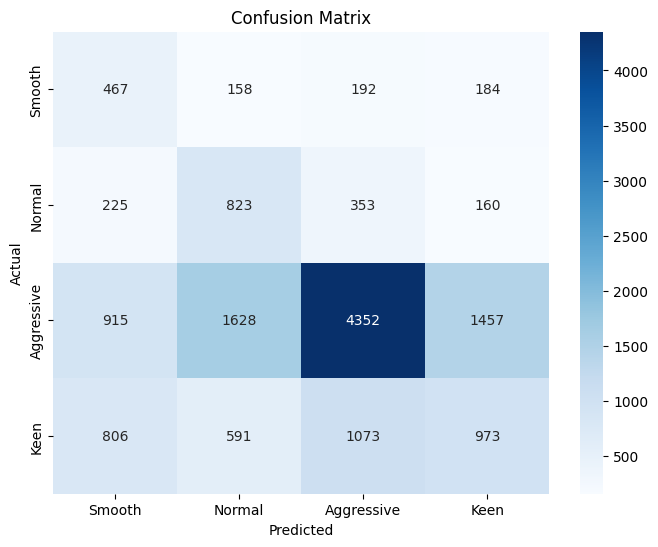

In [36]:
# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Smooth', 'Normal', 'Aggressive', 'Keen'],
            yticklabels=['Smooth', 'Normal', 'Aggressive', 'Keen'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

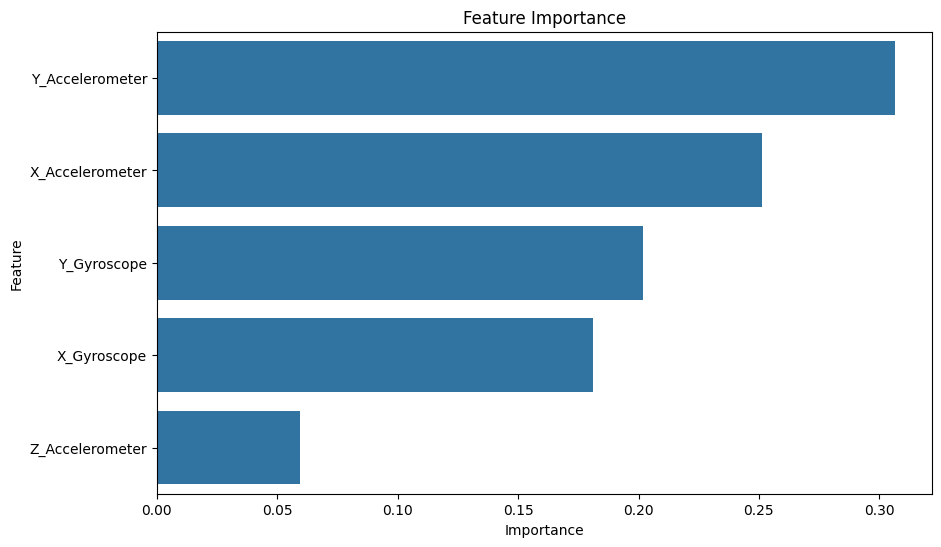

In [37]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [38]:
# # to find the best parameters to overcome the overfitting
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [20, 30, 50],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [5, 10, 15],
#     'min_samples_leaf': [5, 10, 15]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

In [39]:
# finding the max and min values of each column
summary = pd.DataFrame({
    "Column": df.columns,
    "Max Value": df.max(),
    "Min Value": df.min()
})

print(summary)

                          Column  Max Value  Min Value
X_Accelerometer  X_Accelerometer   2.751307  -2.992122
Y_Accelerometer  Y_Accelerometer   3.525965  -4.183152
X_Gyroscope          X_Gyroscope   3.042272  -4.011299
Y_Gyroscope          Y_Gyroscope   2.985861  -3.161054
Cluster                  Cluster   3.000000   0.000000


In [40]:
import joblib

# Save the trained model
model_path = "/content/drive/MyDrive/graduation project/vehicle dynamics/output/rf_model.pkl"
joblib.dump(rf_classifier, model_path)

['/content/drive/MyDrive/graduation project/vehicle dynamics/output/rf_model.pkl']

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Sample data generation (replace with your actual DataFrame)
# ---------------------------------------------------------
data = {
    'X_Accelerometer': np.random.normal(0, 1, 1000),
    'Y_Accelerometer': np.random.normal(0, 1, 1000),
    'X_Gyroscope': np.random.normal(0, 1, 1000),
    'Y_Gyroscope': np.random.normal(0, 1, 1000),
    'Cluster': np.random.randint(0, 4, 1000)  # 4 clusters (0-3)
}
df = pd.DataFrame(data)

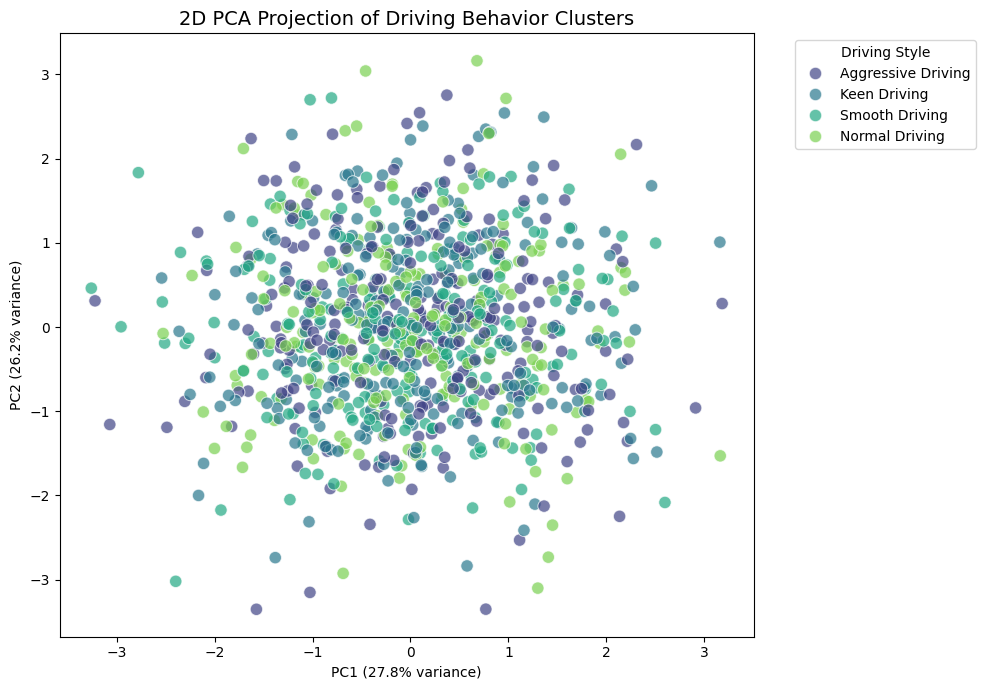

In [42]:
# PCA Visualization with Error Handling
# ---------------------------------------------------------
def plot_cluster_pca(df, features=None):
    """Visualize clusters in 2D PCA space with proper error handling."""

    if features is None:
        features = ['X_Accelerometer', 'Y_Accelerometer',
                   'X_Gyroscope', 'Y_Gyroscope']

    # Verify dataframe structure
    if not all(col in df.columns for col in features + ['Cluster']):
        missing = [col for col in features + ['Cluster'] if col not in df.columns]
        raise ValueError(f"Missing columns in DataFrame: {missing}")

    # Ensure clusters are integers
    df['Cluster'] = df['Cluster'].astype(int)

    # Apply PCA
    pca = PCA(n_components=2)
    X = df[features].values  # Explicit conversion to numpy array
    principal_components = pca.fit_transform(X)

    # Create plot DataFrame
    plot_df = pd.DataFrame({
        'PC1': principal_components[:, 0],
        'PC2': principal_components[:, 1],
        'Cluster': df['Cluster']
    })

    # Cluster naming
    cluster_names = {
        0: 'Smooth Driving',
        1: 'Normal Driving',
        2: 'Aggressive Driving',
        3: 'Keen Driving'
    }
    plot_df['Cluster_Name'] = plot_df['Cluster'].map(cluster_names)

    # Visualization
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='PC1',
        y='PC2',
        hue='Cluster_Name',
        palette='viridis',
        data=plot_df,
        s=80,
        alpha=0.7
    )

    plt.title('2D PCA Projection of Driving Behavior Clusters', fontsize=14)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.legend(title='Driving Style', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig('cluster_visualization_pca.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run the visualization
plot_cluster_pca(df)